<a href="https://colab.research.google.com/github/Meirlen/DataScince/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [ ]:
df = pd.read_csv('/content/alem_year_call_data.csv',index_col=0)
df.head()

,Phone,Status,Duration,Date,Time,Day,FullDate,Weekday,cat_status
0,7765982777,120,21,2021-05-01,12:07:27,1,2021-05-01 12:07:27,Saturday,1
1,7756300509,120,19,2021-05-01,12:07:48,1,2021-05-01 12:07:48,Saturday,1
2,7751168291,Пропущен,11,2021-05-01,12:07:50,1,2021-05-01 12:07:50,Saturday,0
3,7015688662,120,37,2021-05-01,12:08:16,1,2021-05-01 12:08:16,Saturday,1
4,7016473685,150,14,2021-05-01,12:08:26,1,2021-05-01 12:08:26,Saturday,1


In [ ]:
df.shape

(399637, 9)

## Добавтим новый фит Сотовая связь(Telecom)

---



In [ ]:
df['telecom'] = 'N'

In [ ]:
df['Phone_base'] = df['Phone'].astype(str).str[:3]

In [ ]:
df.Phone == '7765982777'

In [ ]:
df.Phone_base.value_counts()

In [ ]:
# create a list of our conditions
conditions = [
    (df['Phone_base'] == '708') | (df['Phone_base'] == '700'),
    (df['Phone_base'] == '707') | (df['Phone_base'] == '747'),
    (df['Phone_base'] == '776') | (df['Phone_base'] == '705') | (df['Phone_base'] == '771')| (df['Phone_base'] == '777'),
    (df['Phone_base'] == '775') | (df['Phone_base'] == '701') | (df['Phone_base'] == '778') | (df['Phone_base'] == '702'),
    (df['Phone_base'] == '721'),
 ]

In [ ]:
# create a list of the values we want to assign for each condition
values = ['altel', 'tele2', 'beeline', 'activ', 'phone']


In [ ]:
# create a new column and use np.select to assign values to it using our lists as arguments
df['telecom'] = np.select(conditions, values)

In [ ]:
df.telecom = df.cat_status.where(df.Status == 'Пропущен',other=1)

In [ ]:
df.head(20)

In [ ]:
df.telecom.value_counts()

altel      120586
activ      114936
tele2       75757
beeline     72641
phone       15229
0             488
Name: telecom, dtype: int64

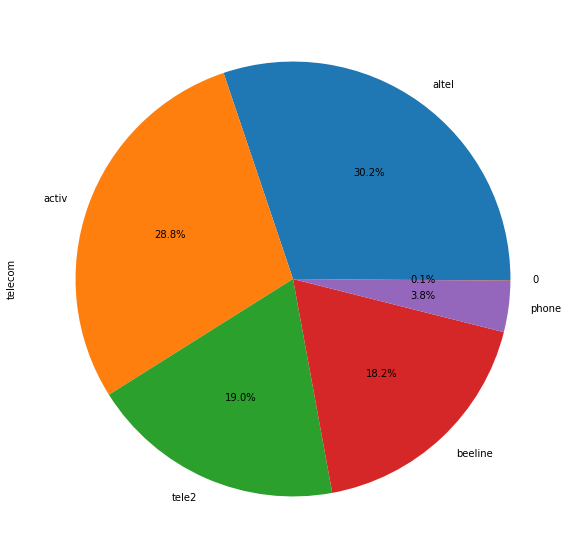

In [ ]:
df.telecom.value_counts().plot.pie(figsize=(11, 10),autopct='%1.1f%%')

In [ ]:
df[df.telecom == '0']

## Пропущенные звонки

In [ ]:
df.head()

,Phone,Status,Duration,Date,Time,Day,FullDate,Weekday,cat_status,telecom,Phone_base
0,7765982777,120,21,2021-05-01,12:07:27,1,2021-05-01 12:07:27,Saturday,1,beeline,776
1,7756300509,120,19,2021-05-01,12:07:48,1,2021-05-01 12:07:48,Saturday,1,activ,775
2,7751168291,Пропущен,11,2021-05-01,12:07:50,1,2021-05-01 12:07:50,Saturday,0,activ,775
3,7015688662,120,37,2021-05-01,12:08:16,1,2021-05-01 12:08:16,Saturday,1,activ,701
4,7016473685,150,14,2021-05-01,12:08:26,1,2021-05-01 12:08:26,Saturday,1,activ,701


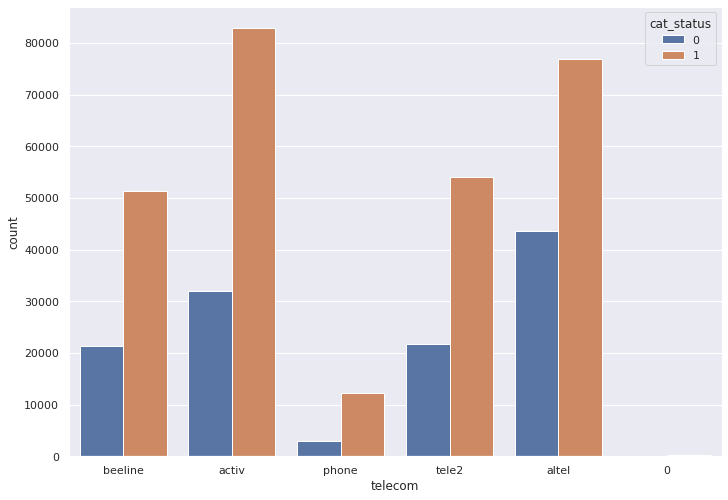

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='telecom', data=df, hue='cat_status');

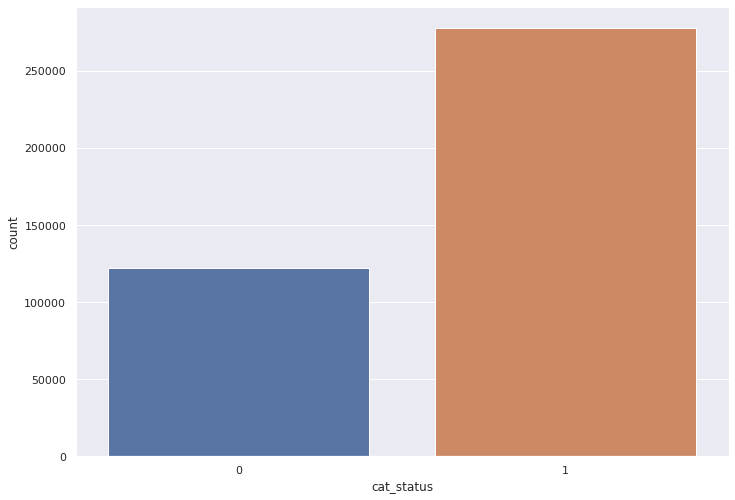

In [ ]:
sns.countplot(x='cat_status', data=df);

# На какое время суток много пропусков?

# Основные статистические показатели

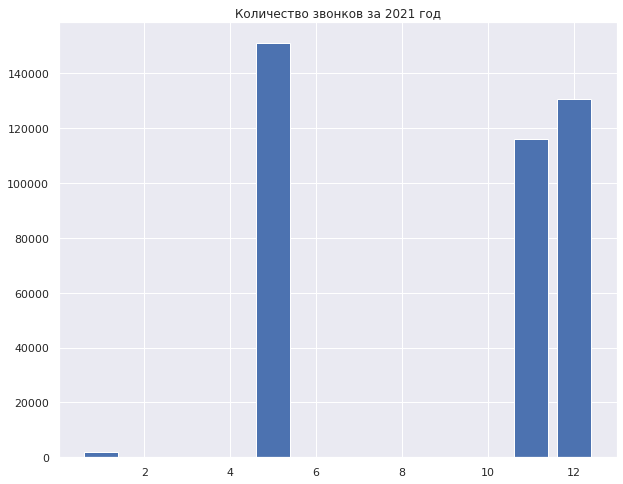

In [ ]:
df['FullDate'] = pd.to_datetime(df['FullDate'])
df_month = df.resample('M',on='FullDate').Phone.count() #.reset_index()
df_month = df_month.groupby(df_month.index.month).sum().reset_index()
df_month = df_month[df_month.Phone > 0]
df_month = df_month.rename(columns={"Phone": "Count","FullDate":"Month"})
plt.figure(figsize=(10,8))
plt.bar(df_month.Month, df_month.Count)
plt.title("Количество звонков за 2021 год")       
plt.show()

# Временной интервал

In [ ]:
hours = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', 
        '07:00', '08:00', '09:00', '10:00', '11:00', '12:00',
         '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00',
         '22:00', '23:00'
        ]

In [ ]:
df_hour = df.resample('H',on='FullDate').Phone.count() #.reset_index()
df_hour = df_hour.groupby(df_hour.index.hour).sum().reset_index()
df_hour['Hours'] = hours
df_hour = df_hour[['Phone','Hours']]
df_hour = df_hour.rename(columns={"Phone": "Count"})
df_hour.head()

,Count,Hours
0,10620,00:00
1,7143,01:00
2,4615,02:00
3,3354,03:00
4,3122,04:00


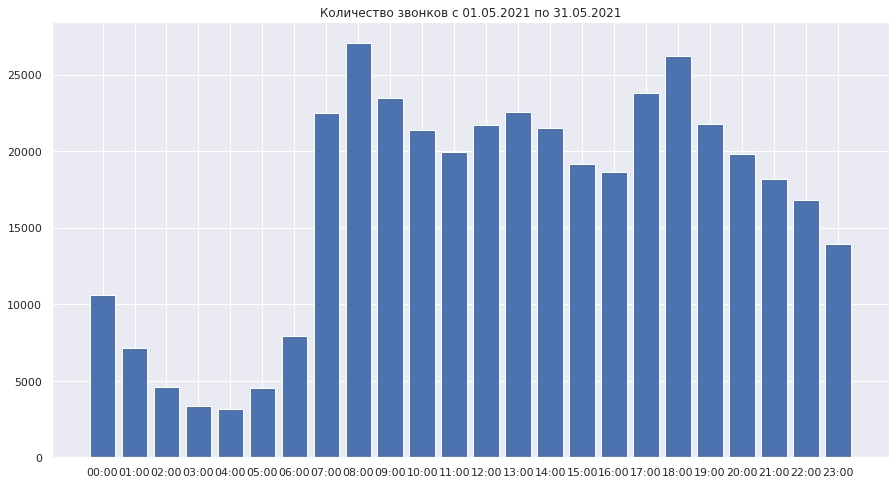

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(df_hour.Hours, df_hour.Count)
plt.title("Количество звонков с 01.05.2021 по 31.05.2021")       
plt.show()

## Временной интервал Пропущенные

In [ ]:
df_missing_call = df[df.cat_status == 0]
df_hour = df_missing_call.resample('H',on='FullDate').Phone.count() #.reset_index()
df_hour = df_hour.groupby(df_hour.index.hour).sum().reset_index()
df_hour['Hours'] = hours
df_hour = df_hour[['Phone','Hours']]
df_hour = df_hour.rename(columns={"Phone": "Count"})
df_hour.head()

,Count,Hours
0,3376,00:00
1,2388,01:00
2,1574,02:00
3,1217,03:00
4,1364,04:00


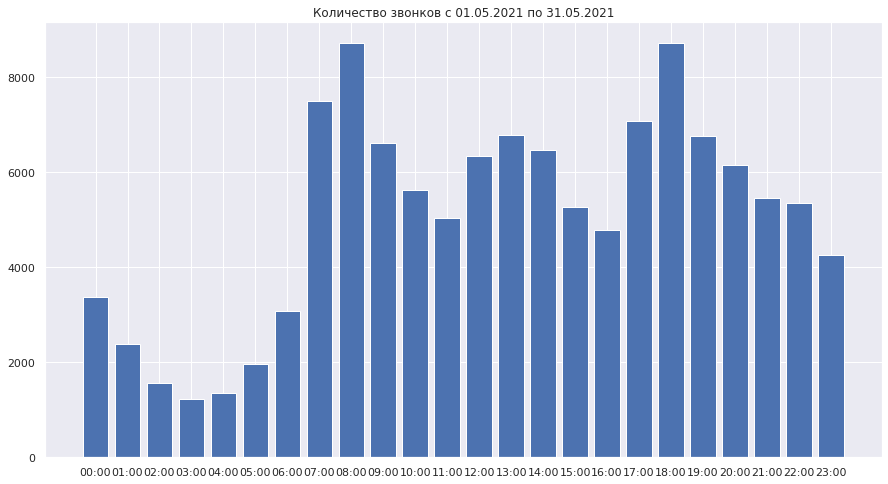

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(df_hour.Hours, df_hour.Count)
plt.title("Количество звонков с 01.05.2021 по 31.05.2021")       
plt.show()

# Дни недели

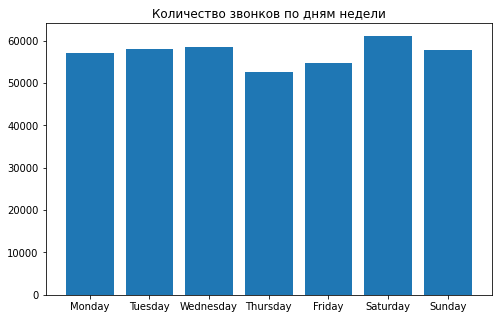

In [ ]:
df_day_week = df.groupby(['Weekday']).count().reset_index()
data = [df_day_week.Weekday,df_day_week.Phone]
df_group_by_day_week = pd.concat(data, axis=1)
df_group_by_day_week = df_group_by_day_week.rename(index=str, columns={'Phone':'Count'})
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts = df_group_by_day_week.groupby('Weekday')['Count'].sum().reindex(cats) 
plt.figure(figsize=(8,5))
plt.bar(counts.index, counts)
plt.title("Количество звонков по дням недели")       
plt.show()

# The most order users

In [ ]:
the_most_users = df['Phone'].value_counts()
the_most_users.shape

(44298,)

In [ ]:
the_most_users.head()

7084397493    18750
7084397503     2198
7087548495      484
7074099272      349
7073980896      313
Name: Phone, dtype: int64

In [ ]:
the_most_users.describe()

count    44298.000000
mean         9.021559
std         91.104885
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max      18750.000000
Name: Phone, dtype: float64

In [ ]:
def show_box_plot(data):
  plt.boxplot([data], labels=['train'])
  plt.title('col')
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


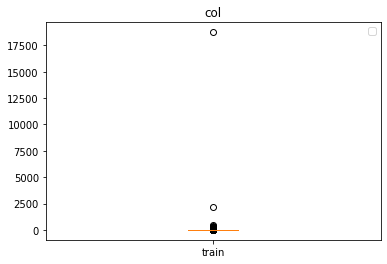

In [ ]:
show_box_plot(the_most_users)

No handles with labels found to put in legend.


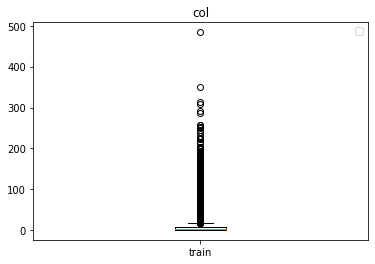

In [ ]:
the_most_users = the_most_users[the_most_users<2000]
show_box_plot(the_most_users)

In [ ]:
the_most_users.describe()

count    44296.000000
mean         8.549056
std         16.213211
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        484.000000
Name: Phone, dtype: float64

No handles with labels found to put in legend.


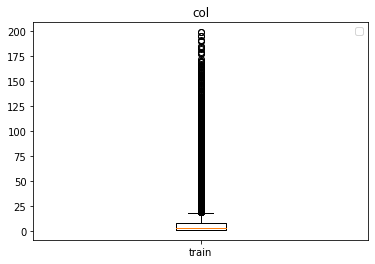

In [ ]:
the_most_users = the_most_users[the_most_users<200]
show_box_plot(the_most_users)

In [ ]:
the_most_users.describe()

count    44270.000000
mean         8.405421
std         15.026002
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        199.000000
Name: Phone, dtype: float64

# Май

In [ ]:
df_may = df[df.FullDate.dt.month == 5]
df_may.shape

(151015, 9)

In [ ]:
the_most_users_for_may = df_may['Phone'].value_counts()
the_most_users_for_may.describe()

count    25513.000000
mean         5.919139
std         28.602130
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       4284.000000
Name: Phone, dtype: float64

No handles with labels found to put in legend.


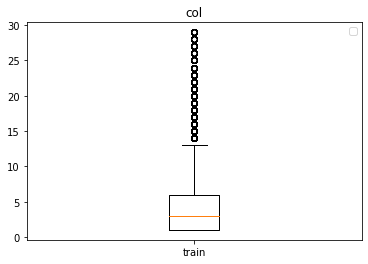

In [ ]:
the_most_users_for_may = the_most_users_for_may[the_most_users_for_may<30]
show_box_plot(the_most_users_for_may)

In [ ]:
the_most_users_for_may.describe()

count    24861.000000
mean         4.648848
std          5.086731
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         29.000000
Name: Phone, dtype: float64

In [ ]:
the_most_users_for_may.head()

7089692512    29
7000992209    29
7787094961    29
7014407429    29
7014201559    29
Name: Phone, dtype: int64

In [ ]:
df_may_info = the_most_users_for_may.to_frame()
df_may_info = df_may_info.rename(columns={'Phone':'Call_size'})
df.index.name = 'Phone'
df_may_info.head()

,Call_size
7089692512,29
7000992209,29
7787094961,29
7014407429,29
7014201559,29


In [ ]:
gen_size = the_most_users_for_may.shape[0]
df_call_per = df_may_info.groupby('Call_size',as_index=False).size()
df_call_per['percent'] =    df_call_per['size'] / (gen_size / 100)
df_call_per = df_call_per.rename(columns={'size':'count_call'})
df_call_per.shape

(29, 3)

In [ ]:
df_call_per.Call_size.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

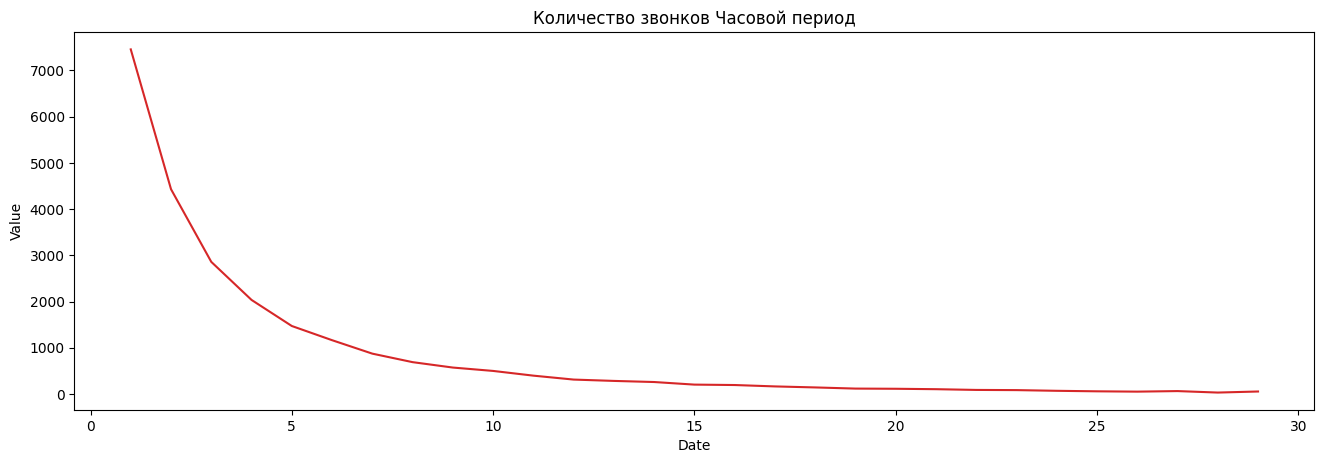

In [ ]:
plot_df(df_call_per, y=df_call_per.count_call, x=df_call_per.Call_size, title='Количество звонков Часовой период')  

In [ ]:
df_call_per.head()

,Call_size,count_call,percent
0,1,7456,29.990749
1,2,4431,17.823096
2,3,2859,11.499940
3,4,2036,8.189534
4,5,1472,5.920920


In [ ]:
from matplotlib.pyplot import hist

(array([14746.,  4673.,  2137.,  1211.,   544.,   564.,   375.,   279.,
          181.,   151.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

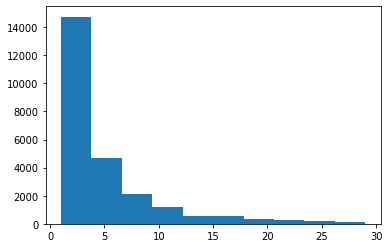

In [ ]:
hist(df_call_per.Call_size, weights=df_call_per.count_call)

No handles with labels found to put in legend.


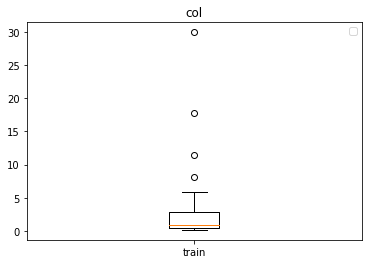

In [ ]:
show_box_plot(df_call_per.percent)

In [ ]:
df_call_per

In [ ]:
# В какое время много пропусков?
# какие потерий в декабре? какая группа потерялась?
# сотовый оператор the most popular

In [ ]:
the_most_users_for_may.to_frame().head()

,Phone
7089692512,29
7000992209,29
7787094961,29
7014407429,29
7014201559,29


In [ ]:
the_most_users_for_may.shape

(24861,)

# Декабрь

In [ ]:
df_dec = df[df.FullDate.dt.month == 12]

df_dec.shape

(130581, 9)

In [ ]:
df_dec.head()

,Phone,Status,Duration,Date,Time,Day,FullDate,Weekday,cat_status
Phone,,,,,,,,,
267209,7783061565,122,24,2021-12-01,12:07:17,1,2021-12-01 12:07:17,Wednesday,1
267210,7755086267,Пропущен,13,2021-12-01,12:07:26,1,2021-12-01 12:07:26,Wednesday,0
267211,7763353360,102,26,2021-12-01,12:08:09,1,2021-12-01 12:08:09,Wednesday,1
267212,7016888993,122,19,2021-12-01,12:08:21,1,2021-12-01 12:08:21,Wednesday,1
267213,7475572762,122,69,2021-12-01,12:08:48,1,2021-12-01 12:08:48,Wednesday,1


In [ ]:
the_most_users_for_dec = df_dec['Phone'].value_counts()
the_most_users_for_dec.describe()

count    20514.000000
mean         6.365458
std         52.273104
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max       7324.000000
Name: Phone, dtype: float64

No handles with labels found to put in legend.


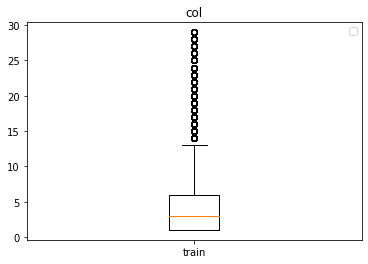

In [ ]:
the_most_users_for_dec = the_most_users_for_dec[the_most_users_for_dec<30]
show_box_plot(the_most_users_for_dec)

In [ ]:
df1 = the_most_users_for_may.to_frame()
df1.index.name = 'Phone'
df1 = pd.DataFrame(data=df1.index)

df2 = the_most_users_for_dec.to_frame()
df2.index.name = 'Phone'
df2 = pd.DataFrame(data=df2.index)


In [ ]:
df1.shape

(24861, 1)

In [ ]:
df2.shape

(19966, 1)

In [ ]:
df1.head()

,Phone
0,7089692512
1,7000992209
2,7787094961
3,7014407429
4,7014201559


In [ ]:
df2.head()

,Phone
0,7087144814
1,7713341849
2,7085530570
3,7761267910
4,7013619387


In [ ]:
df2.shape

(19966, 1)

In [ ]:
df = pd.merge(df1, df2, how='outer', suffixes=('','_y'), indicator=True)
rows_in_df1_not_in_df2 = df[df['_merge']=='left_only'][df1.columns]
rows_in_df1_not_in_df2.head()

,Phone
1,7000992209
5,7474440124
6,7477620524
9,7003592140
10,7024387271


In [ ]:
rows_in_df1_not_in_df2.shape

(16701, 1)

In [ ]:
# В декабре потери составили 16701 звонков по сравнению с маем
# След задача детально исследовать потери 

In [ ]:
keys = list(rows_in_df1_not_in_df2.values)

In [ ]:
the_lost_users_in_dec = the_most_users_for_may[the_most_users_for_may.index.isin(keys)].to_frame()
the_lost_users_in_dec = the_lost_users_in_dec.rename(columns={'Phone':'count_call'})
the_lost_users_in_dec.head()

,count_call
Phone,
7000992209,29
7474440124,29
7477620524,29
7003592140,29
7024387271,29


In [ ]:
the_success_users_in_dec = the_most_users_for_may.drop(the_most_users_for_may[the_most_users_for_may.index.isin(keys)].index.tolist()).to_frame()
the_success_users_in_dec = the_success_users_in_dec.rename(columns={'Phone':'count_call'})
the_success_users_in_dec.shape
# the_lost_users_in_dec = the_lost_users_in_dec.rename(columns={'Phone':'count_call'})
# the_lost_users_in_dec.head()

(8160, 1)

In [ ]:
the_success_users_in_dec.head()


,count_call
Phone,
7089692512,29
7787094961,29
7014407429,29
7014201559,29
7028368608,29


In [ ]:
for key in keys:
  

In [ ]:
the_lost_users_in_dec.shape

(16701, 1)

In [ ]:
df1_test = df1[df1.Phone == 7089692512]
df1_test

,Phone
0,7089692512


In [ ]:
df2_test = df2[df2.Phone == 7089692512]
df2_test

,Phone
949,7089692512


In [ ]:
the_lost_users_in_dec_test = the_lost_users_in_dec[the_lost_users_in_dec.index == 7089692512]
the_lost_users_in_dec_test

,count_call
Phone,


In [ ]:
df1.tail()

,Phone
24856,7079893708
24857,7057593045
24858,7003241935
24859,7027819856
24860,7088408559


In [ ]:
the_lost_users_in_dec['count_call'].value_counts()

1     5882
2     3265
3     1954
4     1307
5      936
6      681
7      509
8      364
9      313
10     248
11     173
12     149
13     139
14     116
16      84
15      83
17      78
18      58
19      54
20      53
21      45
23      42
22      40
24      29
29      29
27      25
25      18
26      18
28       9
Name: count_call, dtype: int64

In [ ]:
the_lost_users_in_ = the_lost_users_in_dec[the_lost_users_in_dec.count_call == 10]
the_lost_users_in_

,count_call
Phone,
7765342393,10
7085529000,10
7085479619,10
7081856258,10
7757965177,10
...,...
7075985975,10
7751855719,10
7052677587,10


## 1 **call**

In [ ]:
# те кто звонили 1 раз и пропали

In [ ]:
the_lost_users_in_1_call = the_lost_users_in_dec[the_lost_users_in_dec.count_call == 1]
the_lost_users_in_1_call

,count_call
Phone,
7014014146,1
7058294068,1
7072167167,1
7212308460,1
7212251080,1
...,...
7056272917,1
7079893708,1
7057593045,1


In [ ]:
keys_1_call = list(the_lost_users_in_1_call.index.values)


In [ ]:
df_may.shape

(151015, 9)

In [ ]:
df_may.head()

,Phone,Status,Duration,Date,Time,Day,FullDate,Weekday,cat_status
0,7765982777,120,21,2021-05-01,12:07:27,1,2021-05-01 12:07:27,Saturday,1
1,7756300509,120,19,2021-05-01,12:07:48,1,2021-05-01 12:07:48,Saturday,1
2,7751168291,Пропущен,11,2021-05-01,12:07:50,1,2021-05-01 12:07:50,Saturday,0
3,7015688662,120,37,2021-05-01,12:08:16,1,2021-05-01 12:08:16,Saturday,1
4,7016473685,150,14,2021-05-01,12:08:26,1,2021-05-01 12:08:26,Saturday,1


In [ ]:
df_1_call_lost_dec = df_may[df_may.Phone.isin(keys_1_call)]
# df_1_call_lost_dec = the_lost_users_in_dec.rename(columns={'Phone':'count_call'})
df_1_call_lost_dec.head()

,Phone,Status,Duration,Date,Time,Day,FullDate,Weekday,cat_status
49,7004116957,127,16,2021-05-01,12:24:43,1,2021-05-01 12:24:43,Saturday,1
56,7079529557,127,28,2021-05-01,12:27:19,1,2021-05-01 12:27:19,Saturday,1
61,7083593387,127,18,2021-05-01,12:29:15,1,2021-05-01 12:29:15,Saturday,1
70,7754033019,127,34,2021-05-01,12:32:10,1,2021-05-01 12:32:10,Saturday,1
85,7055863958,127,28,2021-05-01,12:40:31,1,2021-05-01 12:40:31,Saturday,1


In [ ]:
df_1_call_lost_dec.groupby('cat_status')['Duration'].mean().to_frame()

,Duration
cat_status,
0,13.694761
1,37.455631


In [ ]:
df_1_call_lost_dec.shape

(5882, 9)

In [ ]:
df_1_call_lost_dec.cat_status.value_counts()

1    5443
0     439
Name: cat_status, dtype: int64

In [ ]:
# прорущенные составляют 8 процентов

In [ ]:
df_may.cat_status.value_counts()

1    102157
0     48858
Name: cat_status, dtype: int64

In [ ]:
the_success_users_in_dec

In [ ]:
# те кто звонили 1 раз и звонили в декабре

In [ ]:
the_success_users_in_1_call = the_success_users_in_dec[the_success_users_in_dec.count_call == 1]
the_success_users_in_1_call

In [ ]:
keys_1_call_success = list(the_success_users_in_1_call.index.values)

In [ ]:
df_1_call_success_dec = df_may[df_may.Phone.isin(keys_1_call_success)]
# df_1_call_lost_dec = the_lost_users_in_dec.rename(columns={'Phone':'count_call'})
df_1_call_success_dec.head()

,Phone,Status,Duration,Date,Time,Day,FullDate,Weekday,cat_status
30,7212453325,124,26,2021-05-01,12:18:06,1,2021-05-01 12:18:06,Saturday,1
95,7081234545,108,25,2021-05-01,12:45:49,1,2021-05-01 12:45:49,Saturday,1
134,7782073050,124,2,2021-05-01,12:53:27,1,2021-05-01 12:53:27,Saturday,1
164,7013012078,108,56,2021-05-01,12:59:01,1,2021-05-01 12:59:01,Saturday,1
190,7755264092,127,15,2021-05-01,13:05:17,1,2021-05-01 13:05:17,Saturday,1


In [ ]:
df_1_call_success_dec.shape

(1574, 9)

In [ ]:
df_1_call_success_dec.cat_status.value_counts()

1    1499
0      75
Name: cat_status, dtype: int64

In [ ]:
# прорущенные составляют 5 процентов

count    25513.000000
mean         5.919139
std         28.602130
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       4284.000000
Name: Phone, dtype: float64

In [ ]:
the_most_users.head()

7084397493    18750
7084397503     2198
Name: Phone, dtype: int64

## 2 call

In [ ]:
the_lost_users_in_2_call = the_lost_users_in_dec[the_lost_users_in_dec.count_call == 2]
the_lost_users_in_2_call.head()

,count_call
Phone,
7212372363,2
7478818852,2
7051040715,2
7083564372,2
7003515520,2


In [ ]:
the_lost_users_in_2_call.shape

(3265, 1)

In [ ]:
keys_2_call = list(the_lost_users_in_2_call.index.values)

In [ ]:
df_2_call_lost_dec = df_may[df_may.Phone.isin(keys_2_call)]
# df_1_call_lost_dec = the_lost_users_in_dec.rename(columns={'Phone':'count_call'})
df_2_call_lost_dec.head()

,Phone,Status,Duration,Date,Time,Day,FullDate,Weekday,cat_status
2,7751168291,Пропущен,11,2021-05-01,12:07:50,1,2021-05-01 12:07:50,Saturday,0
7,7014055062,150,32,2021-05-01,12:10:00,1,2021-05-01 12:10:00,Saturday,1
11,7024458440,120,47,2021-05-01,12:10:56,1,2021-05-01 12:10:56,Saturday,1
15,7024458440,Пропущен,7,2021-05-01,12:12:11,1,2021-05-01 12:12:11,Saturday,0
16,7782764308,120,44,2021-05-01,12:13:17,1,2021-05-01 12:13:17,Saturday,1


In [ ]:
df_2_call_lost_dec.shape

(6530, 9)

In [ ]:
df_2_call_lost_dec.cat_status.value_counts()

1    5027
0    1503
Name: cat_status, dtype: int64

In [ ]:
the_success_users_in_2_call = the_success_users_in_dec[the_success_users_in_dec.count_call == 2]
the_success_users_in_2_call

In [ ]:
keys_2_call_success = list(the_success_users_in_2_call.index.values)

In [ ]:
df_2_call_success_dec = df_may[df_may.Phone.isin(keys_2_call_success)]
# df_1_call_lost_dec = the_lost_users_in_dec.rename(columns={'Phone':'count_call'})
df_2_call_success_dec.head()

,Phone,Status,Duration,Date,Time,Day,FullDate,Weekday,cat_status
23,7473309273,120,48,2021-05-01,12:15:44,1,2021-05-01 12:15:44,Saturday,1
45,7473309273,Пропущен,10,2021-05-01,12:22:52,1,2021-05-01 12:22:52,Saturday,0
124,7023267190,120,17,2021-05-01,12:49:45,1,2021-05-01 12:49:45,Saturday,1
145,7013981615,77013981615,32,2021-05-01,12:54:52,1,2021-05-01 12:54:52,Saturday,1
217,7000291184,87000291184,30,2021-05-01,13:12:15,1,2021-05-01 13:12:15,Saturday,1


In [ ]:
df_2_call_success_dec.cat_status.value_counts()

1    1943
0     389
Name: cat_status, dtype: int64